# Assignment: temperature and precipitation data

In [8]:
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

## Temperature

**Compute the mean temperature $\overline{T}$ in °C. Plot it.**

In [9]:
ds = xr.open_dataset(r'C:/Users/david/OneDrive - uibk.ac.at/MA/VU Physik des Klimasystems/LectureNotebooks/Group project/ERA5_LowRes_Monthly_t2m.nc')
ds



<xarray.Dataset>
Dimensions:    (longitude: 480, latitude: 241, time: 480)
Coordinates:
  * longitude  (longitude) float32 -179.6 -178.9 -178.1 ... 178.1 178.9 179.6
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-18 09:36:58 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

NameError: name 'tgrad' is not defined

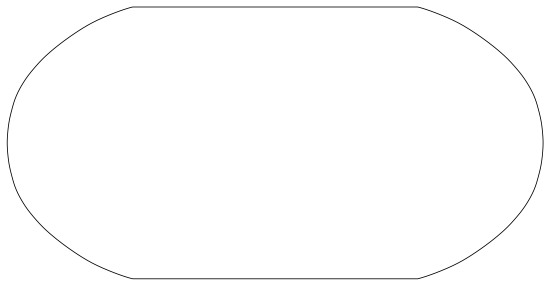

In [7]:
ax = plt.axes(projection = ccrs.Robinson());
tgrad.plot.imshow(ax = ax, transform = ccrs.PlateCarree(), cbar_kwargs = {'label': '°C'});
ax.set_title('Mean temperature in °C');
ax.coastlines(); ax.gridlines(); # 480 steps means 40 years * 12 months;

**Compute the monthly average temperature for each month $\overline{T_M}$ (annual cycle). I expect a variable of dimensions (month: 12, latitude: 241, longitude: 480).** Hint: remember the ``.groupby()`` command we learned in the lesson. **Now plot the average monthly temperature range, i.e. $\overline{T_M}max$ - $\overline{T_M}min$ on a map**.



In [2]:
t_mean_monthly = tgrad.groupy("time.month").mean()     # momnthly mean for each position (lon,lat) over 40 years;
t_mean_max = t_mean_monthly.max(dim = "month")         # take the max of the monthly T (99% in summer)
t_mean_min = t_mean_monthly.min(dim = "month")         # take the min of the monthly T (99% in winter) 
avg_monthly_temp_range = t_mean_max - t_mean_min
avg_monthly_temp_range

NameError: name 'tgrad' is not defined

In [3]:
ax = plt.axes(projection = ccrs.Robinson())
avg_monthly_temp_range.plot.imshow(ax = ax, transform = ccrs.PlateCarree(), cbar_kwargs = {'label':'°C'})
ax.set_title('Average monthly temperature range, ERA5 1979-2018')
ax.coastlines(); ax.gridlines(); # 480 steps means 40 years * 12 months;

NameError: name 'plt' is not defined

**Where is the range of monthly temperature highest? Note the latitudinal differences. Is the variability higher over land or over oceans? Why?**

- siberia; 
- latitudinal differences by radiation; 
- over land, because of specific heat capacity; 


**Compute the zonal mean temperature $\overline{\left[ T \right]}$. Plot it. At what latitudes is the zonal average temperature equal to 0°C? Describe the differences between North and South. Can you explain them easily? Add $\left[\overline{T_{January}}\right]$ and $\left[\overline{T_{July}}\right]$ to the plot.**

- warmer temperatures to the north pole then on the south pole, probably due to the gulfstream wich carries energy from south to north

In [32]:
t_zonal = tmean.mean(dim = "longitudinal")

t_avg_monthly = tgrad.groupy("time.month").mean()
t_jan = t_avg_monthly.sel(month = 1)  # mean temp of january
t_jul = t_avg_monthly.sel(month = 7)  # mean temp of july

NameError: name 'tmean' is not defined

In [33]:
t_zonal.plot.imshow(label = "Total zonal temperature mean")
t_jan.mean(dim = "longitude").plot(label = "January zonal temperature mean")
t_jul.mean(dim = "longitude").plot(label = "July zonal temperature mean")
import matplotlib.pyplot as plt
import numpy as np

def abline(slope, intercept): 
    """ Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get.xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, "--")
    
abline(0,0)
plt.xlim(-90, 90)
index = np.isclose(t_zonal,0,atol = 0.4)
t_zonal.latitude[index]
plt.legend


NameError: name 't_zonal' is not defined

Similarly to the decomposition in time, geophysical fields can also be decomposed zonally:

$A = \left[ A \right] + A^{*}$

Where $\left[ A \right]$ is the zonal average and $A^{*}$ the departure from the zonal average.

**Verify that for any field A:**
1. $\overline{A^{*}} = \overline{A} - \left[ \overline{A} \right]$  
2. $A = \left[ \overline{A} \right] + \left[ A' \right] + \overline{A^{*}} + A'^{*}$ 

**Compute $\overline{T^{*}}$ (use eq. 1 above), and plot it on a map. Discuss**

In [34]:
zonal_dep_avg_time = (t_mean - t_zonal) # tmean only averaged over time and longitude, broadcasting is good
ax = plt.axes(projection == ccrs.Robinson())
zonal_dep_avg_time.plot.imshow(ax = ax, transform = ccrs.PlateCarree(), cbar_kwargs={"label": "°C"})
ax.set_title("Temperature departure from the zonal average, averaged over time")
ax.coastlines(); ax.gridlines(); # 480 steps means 40 years * 12 months

NameError: name 't_mean' is not defined

**Dicussion:**

- positive: warmer temperatures then average at this latitude
- negative: cooler temperatures then average at this latitude
- east antarctica is colder then westantarctica cause of higher mountains;

**Compute the zonal mean temperature over land $\overline{\left[ T_{Land} \right]}$ and over oceans $\overline{\left[ T_{Oceans} \right]}$ and plot them both on the same plot. Discuss.**

In [35]:
ds = xr.open_dataset(r'C:\Users\david\OneDrive - uibk.ac.at\MA\VU Physik des Klimasystems\Africa_MJM\LectureNotebooks\Week03\ERA5_LowRes_Invariant.nc')
ds.lsm
land_t = t_mean.where(ds.lsm > 0.5)
land_t.plot.imshow()
plt.title("Temperature land")

NameError: name 't_mean' is not defined

In [ ]:
ocean_t = tmean.where(ds.lsm < 0.5)
ocean_t.plot()
plt.title("Temperature ocean")


In [ ]:
land_t_zonal = land_t.mean(dim = "longitude")
ocean_t_zonal = ocean_t.mean(dim = "longitude")
land_t_zonal.plot(label = "land")
ocean_t_zonal.plot(label = "ocean")
plt.legend
plt.xlim(-90,90)
plt.title("Zonal and temporal mean temperature")


**Discussion**
- Ocean smaller variation in temporal averaged temperature; 
- influence of tibetian plateau (himalaya) can be seen at ~35°N, relative cold temperatures;
- no landmasses in range of ~50°S to ~60°S


## Precipitation

Open the precipitation file and explore it. The units of monthly precipitation are wrongly labeled (unfortunately). They should read: **m per day**.

In [ ]:
ds = xr.open_dataset(r'C:\Users\david\OneDrive - uibk.ac.at\MA\VU Physik des Klimasystems\Africa_MJM\LectureNotebooks\Week03\ERA5_LowRes_Monthly_tp.nc')
ds.tp.time

**Compute the average total annual precipitation (average precipitation over a year, in mm yr$^{-1}$) and store it in a variable called "annual_prcp". Plot it.**

In [7]:
annual_prcp = ds.tp.mean(dim = "time") * 1000 * 365.25

ax.plt.axes(projection = ccrs.Robinson())
annual_prcp.plot.imshow(ax = ax, transfrom = ccrs.PlateCarree(), cmap = "YlGnBu", levels = [50, 200, 500, 700, 1000, 1500, 2000, 3000, 5000], cbar_kwargs={"label": "mm yr^-1"})
ax.set_title("Average total annual precipitation, ERA5 1979 - 2018")
ax.coastlines(); ax.gridlines(); 


AttributeError: 'Dataset' object has no attribute 'tp'

**Draw a new plot of "annual_prcp", this time with a new colormap ('YlGnBu') and with the following discrete levels specified: [50, 200, 500, 700, 1000, 1500, 2000, 3000, 5000]. Now have a look at the patterns again.**

**Using your knowledge from the lecture which didn't take place yet ;-), try to answer questions such as:**
**- why are the oceans (mostly) dryer than land in the subtropics?**
more convection over land (cause specific heat capacity is lower over land) + more orographic lifting patterns over oceans are coupled to the postition of the ITCZ

**- this was not covered in the lecture, but why is there only one large desert (in Africa) while other continents at the same latitute are rather wet?**

headly cell 30° subsident motion;
orographic differences -> moonsoon cause of himalaya in Asia
in Mexico: Gulfstream;
africa has a very broad land mass, extremely hot, very low humidity -> low precip.;


**- why are the eastern subtropical oceans dryer than in their western part? Do all three oceans have similar patterns for precipitation?**
cause of the trade winds from the east in the subtropics the land acts as a barrier for the precip.; 
indian ocean similar, but not equal pattern, cause of the different shape of the continent and the different way that the ITCZ takes;

**- where does it fall more than 3000 mm precipitation a year? Less than 50 mm precipitation a year?**
more than 3000mm precip.: ITCZ + before the himalaya, andes; 
less than 50mm precip.: Sahara, East antarctica, 30°S hadley cell subsidence in the lee of the continents, desert gobi, 

**- Note that it could be easy to use the ".where()" function to highlight these areas easily. Optional: can you come up with a plot showing them on the map?**



In [8]:
annual_prcp = ds.tp.mean(dim = "time") * 1000 * 365.25
index = annual_prcp.where(annual_prcp > 3000) # sets all to NaN; 

ax = plt.axes(projection = ccrs.Robinson())
index.plot.imshow(ax = ax, transform = ccrs.PlateCarree(), cmap = "YlGnBu", levels = [3000, 3500, 4000, 4500, 5000], cbar_kwargs = {"label" : "mm yr^-1"})
ax.coastlines(); ax.gridlines();                                                                                                   

AttributeError: 'Dataset' object has no attribute 'tp'

In [9]:
index.max()

NameError: name 'index' is not defined

In [10]:
annual_prcp = ds.tp.mean(dim = "time") * 1000 * 365.25
index = annual_prcp.where(annual_prcp < 50) # sets all to NaN which are not less than 50 mm 

ax = plt.axes(projection = ccrs.Robinson())
index.plot.imshow(ax = ax, transform = ccrs.PlateCarree(), cmap = "YlGnBu", levels = [0, 10, 20, 30, 40, 50], cbar_kwargs = {"label" : "mm yr^-1"})
ax.coastlines(); ax.gridlines();  

AttributeError: 'Dataset' object has no attribute 'tp'

**Plot the average precipitation in January on a map. Do the same with precipitation in July, and choose the same levels for both maps in order to compare them. Discuss.**

In [11]:
p_avg_jan = ds.tp.groupy("time.month").mean().sel(month = 1) * 1000 * 31 # mm per month
ax = plt.axes(projection = ccrs.Robinson())
p_avg_jan.plot.imshow(ax = ax, transform = ccrs.PlateCarree(), cmap = "YlGnBu", levels = [5,20,50,70,100,150,200,300,500], cbar_kwargs = {"label" : "mm/month"})
ax.set_title("Average precipitation January, ERA5 1979 - 2018")
ax.coastlines(); ax.gridlines(); 

AttributeError: 'Dataset' object has no attribute 'tp'

In [12]:
p_avg_jul = ds.tp.groupy("time.month").mean().sel(month = 7) * 1000 * 31 # mm per month
ax = plt.axes(projection = ccrs.Robinson())
p_avg_jul.plot.imshow(ax = ax, transform = ccrs.PlateCarree(), cmap = "YlGnBu", levels = [5,20,50,70,100,150,200,300,500], cbar_kwargs = {"label" : "mm/month"})
ax.set_title("Average precipitation July, ERA5 1979 - 2018")
ax.coastlines(); ax.gridlines(); 

AttributeError: 'Dataset' object has no attribute 'tp'

In [13]:
p_avg_austria = ds.tp.groupy("time.month").mean().sel(month = 12) * 1000 * 31 # mm per month
ax = plt.axes(projection = ccrs.Robinson())
p_avg_austria.plot.imshow(ax = ax, transform = ccrs.PlateCarree(), cmap = "YlGnBu", levels = [5,20,50,70,100,150,200,300,500])
ax.coastlines(); 
ax.add_feature(cartopy.feature.BORDERS);
ax.set_extent([9, 18, 45, 52], crs = ccrs.PlateCarree())

AttributeError: 'Dataset' object has no attribute 'tp'